In [2]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import lightgbm as lgb
%matplotlib inline

# 폰트설정 (맥)
from matplotlib import font_manager
plt.rcParams["font.family"] = 'NanumGothicCoding'
from matplotlib import rc
rc('font', family="Arial Unicode MS")

# 폰트 설정 (윈도우)
from matplotlib import rc

rc('font', family='Malgun Gothic')

In [3]:
train = pd.read_csv('datas/train.csv')

train['P/m^2'] = train['transaction_real_price']/train['exclusive_use_area'] # 평당가격 column 추가

train['year'] =  round(train['transaction_year_month'] / 100)
train['month'] = train['transaction_year_month'] % 100

train = train[['transaction_id', 'apartment_id', 'city',  'dong', 'jibun', 'apt',
               'addr_kr', 'exclusive_use_area', 'year_of_completion',
               'transaction_year_month','year', 'month', 'transaction_date', 'floor', 'P/m^2',
               'transaction_real_price']]

In [4]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,year,month,transaction_date,floor,P/m^2,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,2008.0,1,21~31,2,442.112709,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,2008.0,1,1~10,6,201.673893,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,2008.0,1,1~10,6,454.330895,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,2008.0,1,11~20,15,806.065988,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,2008.0,1,21~31,3,617.188705,120000


In [6]:
train["dong2"] = train["dong"].astype('category')
train["transaction_id2"] = train["transaction_id"].astype('category')
train["apartment_id2"] = train["apartment_id"].astype('category')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   transaction_id          1216553 non-null  int64   
 1   apartment_id            1216553 non-null  int64   
 2   city                    1216553 non-null  object  
 3   dong                    1216553 non-null  object  
 4   jibun                   1216553 non-null  object  
 5   apt                     1216553 non-null  object  
 6   addr_kr                 1216553 non-null  object  
 7   exclusive_use_area      1216553 non-null  float64 
 8   year_of_completion      1216553 non-null  int64   
 9   transaction_year_month  1216553 non-null  int64   
 10  year                    1216553 non-null  float64 
 11  month                   1216553 non-null  int64   
 12  transaction_date        1216553 non-null  object  
 13  floor                   1216553 non-null  

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
train_x = train[["dong2","apartment_id2","exclusive_use_area","year_of_completion","year","month","floor"]]
train_y = train[["transaction_real_price"]]

In [10]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=13)

In [11]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [12]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [13]:
model = lgb.train(params, train_ds, 5000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7900
[LightGBM] [Info] Number of data points in the train set: 973242, number of used features: 7
[LightGBM] [Info] Start training from score 38208.178344
Training until validation scores don't improve for 100 rounds


/Users/ijiyeong/opt/anaconda3/envs/jiyoung/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/ijiyeong/opt/anaconda3/envs/jiyoung/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[100]	valid_0's l2: 1.89808e+08
[200]	valid_0's l2: 6.28634e+07
[300]	valid_0's l2: 3.60271e+07
[400]	valid_0's l2: 2.79067e+07
[500]	valid_0's l2: 2.43984e+07
[600]	valid_0's l2: 2.24193e+07
[700]	valid_0's l2: 2.12614e+07
[800]	valid_0's l2: 2.06085e+07
[900]	valid_0's l2: 2.01798e+07
[1000]	valid_0's l2: 1.97351e+07
[1100]	valid_0's l2: 1.93952e+07
[1200]	valid_0's l2: 1.91179e+07
[1300]	valid_0's l2: 1.88106e+07
[1400]	valid_0's l2: 1.85775e+07
[1500]	valid_0's l2: 1.83114e+07
[1600]	valid_0's l2: 1.81059e+07
[1700]	valid_0's l2: 1.79082e+07
[1800]	valid_0's l2: 1.77342e+07
[1900]	valid_0's l2: 1.75627e+07
[2000]	valid_0's l2: 1.74259e+07
[2100]	valid_0's l2: 1.73035e+07
[2200]	valid_0's l2: 1.71959e+07
[2300]	valid_0's l2: 1.70862e+07
[2400]	valid_0's l2: 1.69801e+07
[2500]	valid_0's l2: 1.68871e+07
[2600]	valid_0's l2: 1.68067e+07
[2700]	valid_0's l2: 1.67377e+07
[2800]	valid_0's l2: 1.66689e+07
[2900]	valid_0's l2: 1.65947e+07
[3000]	valid_0's l2: 1.65347e+07
[3100]	valid_0's l2

In [14]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [15]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
rmse = mean_squared_error(test_y, predict_test)**0.5

In [16]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print('RMSE score:', rmse)

Mean squared error:  15768326.988400154
R2 score:  0.9836774483421894
RMSE score: 3970.935278797698


In [120]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [121]:
final_result.columns = ['label','predict']

<AxesSubplot:xlabel='label', ylabel='predict'>

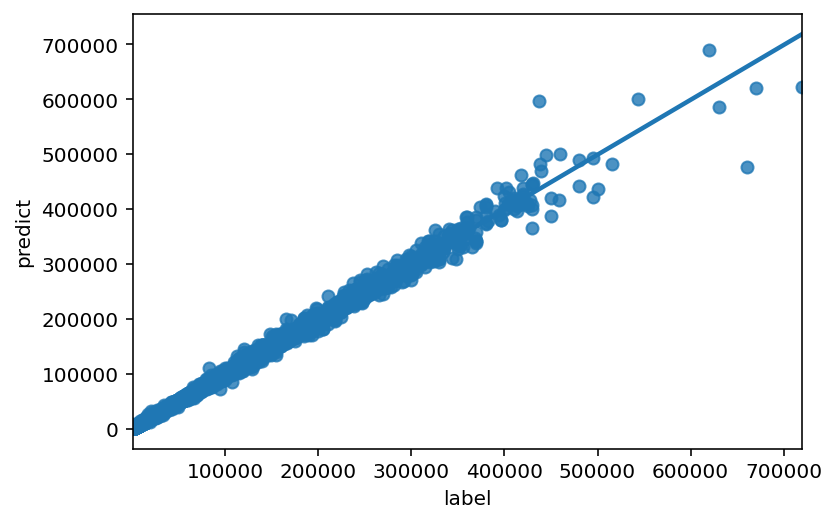

In [122]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [124]:
model = (params, train_ds, 2000, test_ds, verbose_eval=100, early_stopping_rounds=100)

SyntaxError: invalid syntax (<ipython-input-124-3dc24dbc19d8>, line 1)

In [ ]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [ ]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
rmse = mean_squared_error(test_y, predict_test)**0.5

In [ ]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print('RMSE score:', rmse)

In [ ]:
rrmse = mean_squared_error(test_y, predict_test,squared=False)
rrmse

In [ ]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [ ]:
final_result.columns = ['label','predict']

In [ ]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [125]:
model = lgb.train(params, train_ds, 2000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8278
[LightGBM] [Info] Number of data points in the train set: 973242, number of used features: 10
[LightGBM] [Info] Start training from score 38208.178344
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.41795e+08
[200]	valid_0's l2: 2.33432e+07
[300]	valid_0's l2: 5.65776e+06
[400]	valid_0's l2: 2.53571e+06
[500]	valid_0's l2: 1.81505e+06
[600]	valid_0's l2: 1.57434e+06
[700]	valid_0's l2: 1.44581e+06
[800]	valid_0's l2: 1.37198e+06
[900]	valid_0's l2: 1.32783e+06
[1000]	valid_0's l2: 1.28871e+06
[1100]	valid_0's l2: 1.26054e+06
[1200]	valid_0's l2: 1.23521e+06
[1300]	valid_0's l2: 1.21705e+06
[1400]	valid_0's l2: 1.20341e+06
[1500]	valid_0's l2: 1.19313e+06
[1600]	valid_0's l2: 1.19087e+06
[1700

In [126]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [127]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
rmse = mean_squared_error(test_y, predict_test)**0.5

In [128]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print('RMSE score:', rmse)

Mean squared error:  1158964.3957909748
R2 score:  0.9988003003594625
RMSE score: 1076.5520868917467


In [129]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [130]:
final_result.columns = ['label','predict']

<AxesSubplot:xlabel='label', ylabel='predict'>

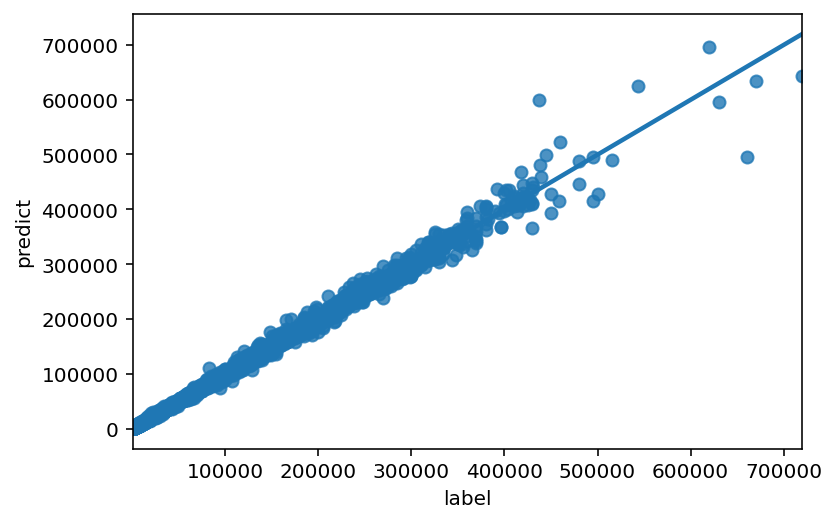

In [131]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [132]:
model = lgb.train(params, train_ds, 5000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8278
[LightGBM] [Info] Number of data points in the train set: 973242, number of used features: 10
[LightGBM] [Info] Start training from score 38208.178344
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.41795e+08
[200]	valid_0's l2: 2.33432e+07
[300]	valid_0's l2: 5.65776e+06
[400]	valid_0's l2: 2.53571e+06
[500]	valid_0's l2: 1.81505e+06
[600]	valid_0's l2: 1.57434e+06
[700]	valid_0's l2: 1.44581e+06
[800]	valid_0's l2: 1.37198e+06
[900]	valid_0's l2: 1.32783e+06
[1000]	valid_0's l2: 1.28871e+06
[1100]	valid_0's l2: 1.26054e+06
[1200]	valid_0's l2: 1.23521e+06
[1300]	valid_0's l2: 1.21705e+06
[1400]	valid_0's l2: 1.20341e+06
[1500]	valid_0's l2: 1.19313e+06
[1600]	valid_0's l2: 1.19087e+06
[1700

In [133]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [134]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
rmse = mean_squared_error(test_y, predict_test)**0.5

In [135]:
rrmse = np.sqrt(mse)
rrmse

1070.216238782746

In [136]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print('RMSE score:', rmse)

Mean squared error:  1145362.7977542873
R2 score:  0.9988143800260464
RMSE score: 1070.216238782746


In [137]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [138]:
final_result.columns = ['label','predict']

<AxesSubplot:xlabel='label', ylabel='predict'>

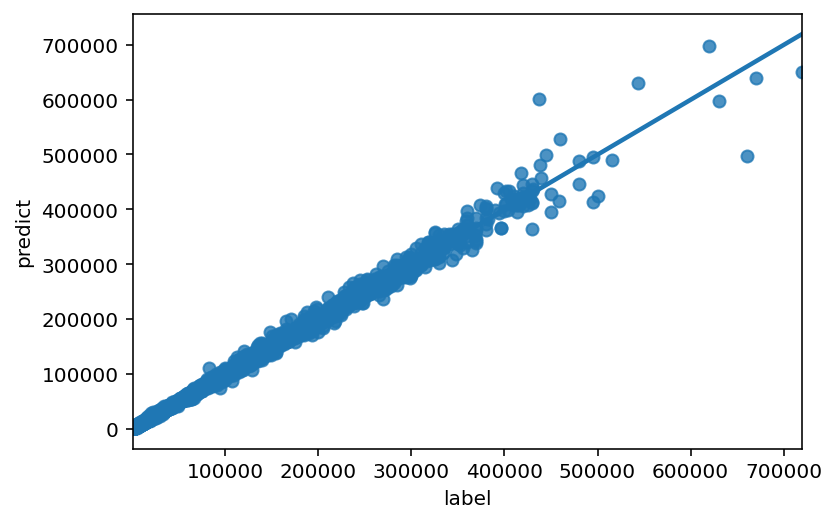

In [139]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 19 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   transaction_id          1216553 non-null  int64   
 1   apartment_id            1216553 non-null  int64   
 2   city                    1216553 non-null  object  
 3   dong                    1216553 non-null  object  
 4   jibun                   1216553 non-null  object  
 5   apt                     1216553 non-null  object  
 6   addr_kr                 1216553 non-null  object  
 7   exclusive_use_area      1216553 non-null  float64 
 8   year_of_completion      1216553 non-null  int64   
 9   transaction_year_month  1216553 non-null  int64   
 10  year                    1216553 non-null  float64 
 11  month                   1216553 non-null  int64   
 12  transaction_date        1216553 non-null  object  
 13  floor                   1216553 non-null  

In [171]:
train_x = train[["dong2","apartment_id2","exclusive_use_area","year_of_completion","year","month","floor"]]
train_y = train[["transaction_real_price"]]

In [172]:
model = lgb.train(params, train_ds, 5000, test_ds, verbose_eval=100, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8278
[LightGBM] [Info] Number of data points in the train set: 973242, number of used features: 10
[LightGBM] [Info] Start training from score 38208.178344
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.41795e+08
[200]	valid_0's l2: 2.33432e+07
[300]	valid_0's l2: 5.65776e+06
[400]	valid_0's l2: 2.53571e+06
[500]	valid_0's l2: 1.81505e+06
[600]	valid_0's l2: 1.57434e+06
[700]	valid_0's l2: 1.44581e+06
[800]	valid_0's l2: 1.37198e+06
[900]	valid_0's l2: 1.32783e+06
[1000]	valid_0's l2: 1.28871e+06
[1100]	valid_0's l2: 1.26054e+06
[1200]	valid_0's l2: 1.23521e+06
[1300]	valid_0's l2: 1.21705e+06
[1400]	valid_0's l2: 1.20341e+06
[1500]	valid_0's l2: 1.19313e+06
[1600]	valid_0's l2: 1.19087e+06
[1700

In [173]:
predict_train = model.predict(train_x, predict_disable_shape_check=True)
predict_test = model.predict(test_x, predict_disable_shape_check=True)

ValueError: train and valid dataset categorical_feature do not match.

In [174]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

ValueError: train and valid dataset categorical_feature do not match.

In [ ]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
rmse = mean_squared_error(test_y, predict_test)**0.5

In [ ]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print('RMSE score:', rmse)

In [ ]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [ ]:
final_result.columns = ['label','predict']

In [ ]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [17]:
test = pd.read_csv('datas/test.csv')

In [18]:
test

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21
...,...,...,...,...,...,...,...,...,...,...,...,...
5458,1174640,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.0500,2003,201710,11~20,7
5459,1175575,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.9300,2009,201712,1~10,4
5460,1157024,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.1880,2004,201712,21~31,23
5461,1136863,3371,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,92.4400,2005,201710,21~31,1


In [19]:
test["dong2"] = test["dong"].astype('category')
test["transaction_id2"] = test["transaction_id"].astype('category')
test["apartment_id2"] = test["apartment_id"].astype('category')

In [20]:
test['year'] =  round(test['transaction_year_month'] / 100)
test['month'] = test['transaction_year_month'] % 100

In [21]:
test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,dong2,transaction_id2,apartment_id2,year,month
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2,목동,1145756,10453,2017.0,11
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2,초량동,1198704,989,2017.0,8
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2,괴정동,1222384,8597,2017.0,10
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10,대치동,1179897,11086,2017.0,7
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21,다대동,1223091,2121,2017.0,12


In [26]:
test_x = test[["dong2","apartment_id2","exclusive_use_area","year_of_completion","year","month","floor"]]

In [27]:
predict_test = model.predict(test_x)

In [28]:
predict_test.mean()

52862.063131188894

In [29]:
predict_test

array([38322.80180991, 15451.11790345, 14540.77954161, ...,
       60478.63370584, 40757.50339261, 19785.23628233])